# Explore Photometric Data about TIC Object

In [ ]:
TICID = 177309385

In [18]:
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('TIC '+str(TICID)).download_all().stitch()

/srv/conda/envs/notebook/lib/python3.7/site-packages/lightkurve/collections.py:212: LightkurveWarning: Stitching a `LightCurveFileCollection` which contains both SAP and PDCSAP_FLUX. Plotting PDCSAP_FLUX. You can remove this warning by using `LightCurveFileCollection.PDCSAP_FLUX.stitch()`.
  LightkurveWarning)


CDPP Noise Estimate:

In [22]:
lc.estimate_cdpp()

66.56332722690514

Raw Light Curve:

In [ ]:
%matplotlib inline
lc.plot();

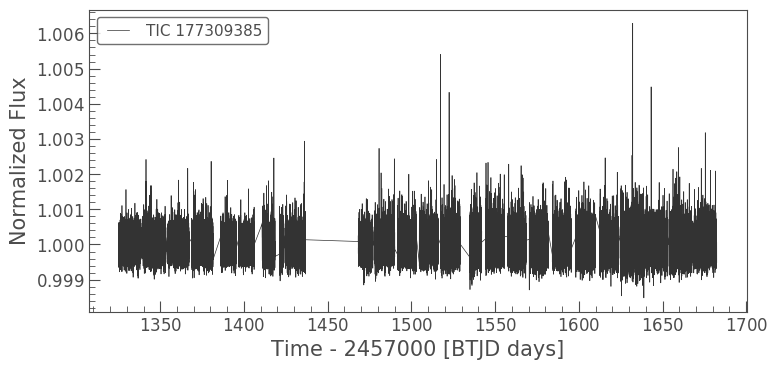

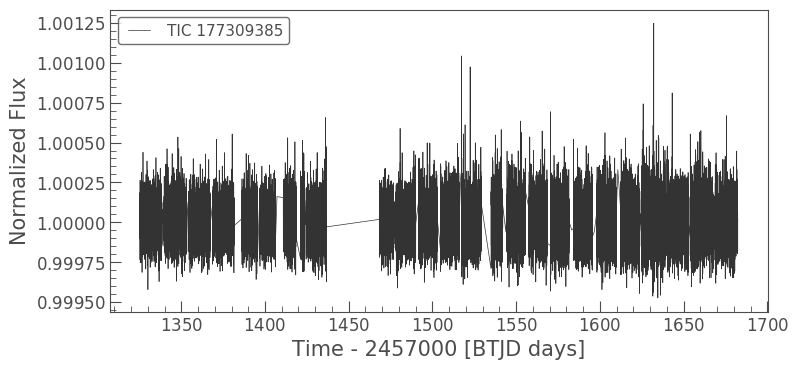

In [24]:
flat_lc = lc.remove_nans().flatten()
flat_lc.plot()

bin_lc = flat_lc.bin(binsize=5)
bin_lc.plot()

In [25]:
pg = lc.remove_nans().flatten().bin(binsize=5).to_periodogram(oversample_factor=2)
period = pg.period_at_max_power
print(period)

0.06249853352133496 d


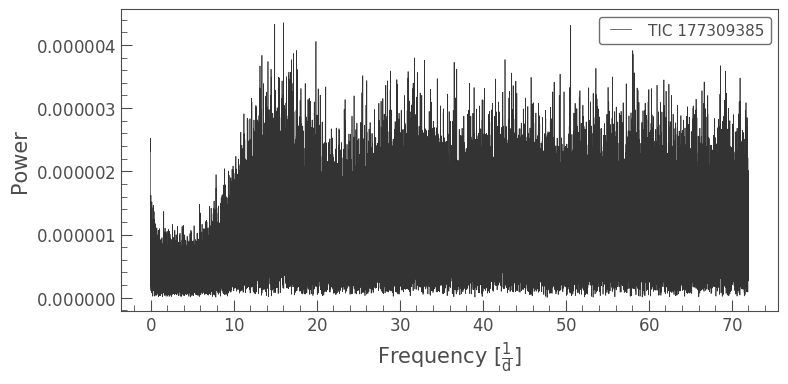

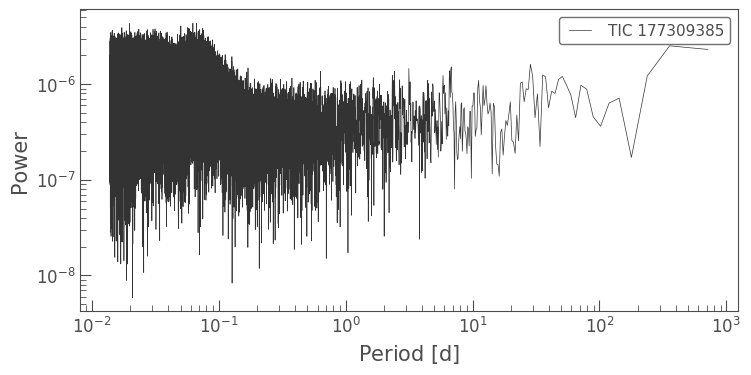

In [26]:
pg.plot()
pg.plot(view='period', scale='log');

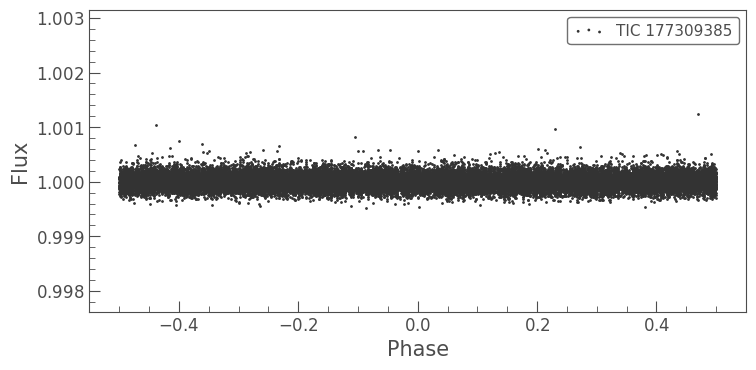

In [27]:
folded_lc = bin_lc.fold(period=period)
folded_lc.scatter();

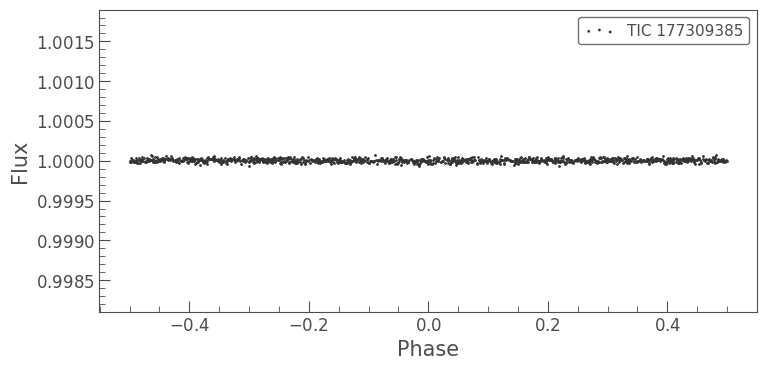

In [28]:
# Final Transit Light Curve (best snapshot of transit event):
transit_lc = folded_lc.bin(binsize=35)
transit_lc.scatter();